In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Programming tasks (* without using PyPortflioOPT and any similar libraries, recurred programming language is Python/ Jupyter):\
 • Scrap 10 ETFs from yahoo finance. Use this data for analysis below.\
 • Write the Mean Variance Optimization function/class for portfolio of n assets that will produce results of the following optimizations:\
 • Minimum volatility\
 • Maximum Sharpe Ratio\
 • Efficient risk (minimize risk given a target return)\
 • Efficient return\
 • Maximum Diversification (for ref. Choueifaty, Yves, and Yves Coignard. 2008. “Toward Maximum Diversification.”)\


Theory:\
 • What methods do you know for generating independent samples of the standard normal distribution?\
 • What variance reduction techniques do you know?\
 • You just bought one share of stock A and want to hedge it by shorting stock B. How many shares of B should you short to minimize the variance of the hedged position?\
 • How many comparisons do you need to find the maximum in a set of n distinct numbers? How many comparisons do you need to find both the max and min in a set of n distinct numbers?

__Theory__

###### What methods do you know for generating independent samples of the standard normal distribution?

* Bootstrap
* Monte-Carlo simulations\
Provided, parameters for standard normal distribution are set.

In [2]:
mu = 0
sigma = 1

In [3]:
norm_std_dist = np.random.normal(mu,sigma,10000)
norm_std_dist

array([-0.69214675,  0.0258231 , -0.10739688, ...,  0.9063273 ,
       -1.14433851,  0.8395921 ])

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


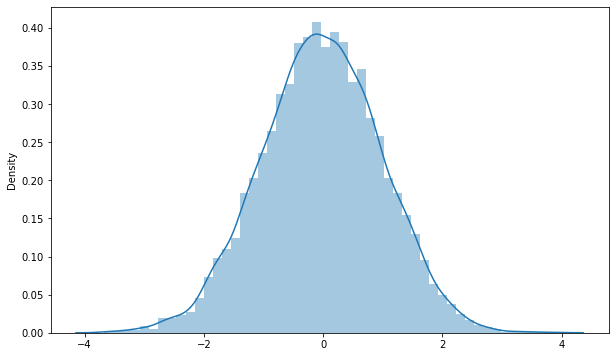

In [4]:
plt.figure(figsize=(10,6))
sns.distplot(norm_std_dist);

###### What variance reduction techniques do you know?


* Stratification and post-stratification
* CUPED (controlled-experiment using pre-experiment data)
* Variance-Weighted Estimators
* Monte-Carlo simulation

##### You just bought one share of stock A and want to hedge it by shorting stock B. How many shares of B should you short to minimize the variance of the hedged position?

$-x$ - weight of stock B in portfolio (i.e. share of initial capital to purchase stock B. It is negative, because of the short-selling)\
$(1-x)$ - weight of stock A in portfolio\
$x+(1-x) = 1$\
$K$ - initial capital amount\
$r_A$ - price of stock A\
$r_B$ - price of stock B\
$Var(P) = (1-x)*\sigma(r_A) - x*\sigma(r_B) \rightarrow min_x$\
$Var(P) = (1-x)^2*\sigma^2(r_A) - 2 * cov(r_A, r_b) + (-x)^2*\sigma^2(r_B) \rightarrow min_x$\
$Var(P)$ - portfolio variance\
$\frac{\partial(Var(P)}{\partial(X)}$ = $-2*(1-x)*\sigma^2(r_A)-2*x*\sigma^2(r_B) = 0$

After finding x - weight of stock B in the portfolio, I multiply K by x $(K*x)$ - total sum of stocks B,  and divide $(K*x)$ by $r_b$ to get the final answer:
$(K*x) / r_B$

##### How many comparisons do you need to find the maximum in a set of n distinct numbers? How many comparisons do you need to find both the max and min in a set of n distinct numbers?

* How many comparisons do you need to find the maximum in a set of n distinct numbers?\
If n is odd, 3 * (n-1) / 2\
If n is even, 1 + 3*(n-2)/2 = 3n/2-2
* How many comparisons do you need to find both the max and min in a set of n distinct numbers?\
Every comparison-based algorithm for finding both the minimum and the maximum of n elements requires at least (3n/2)-2 comparisons

__Scrap 10 ETFs from yahoo finance. Use this data for analysis below.__

In [5]:
!pip -q install pandas-datareader
!pip -q install requests_cache

In [6]:
from pandas_datareader import data as parse
import requests_cache
import datetime

In [7]:
!pip -q install yfinance
import yfinance as yf

Thought that it is easier to ctrl-c + ctrl-v when scraping (if there are 10 etf, not 100), rather than writing own scraper

In [8]:
ticker_list = ['SPY','IVV','VOO','VTI','QQQ','VEA','VTV','IEFA','AGG','VUG']

In [9]:
# spy_df = yf.download(tickers = 'SPY', start = '2021-01-01').Close
# ivv_df = yf.download(tickers = 'IVV', start = '2021-01-01').Close
# voo_df = yf.download(tickers = 'VOO', start = '2021-01-01').Close
# vti_df = yf.download(tickers = 'VTI', start = '2021-01-01').Close
# qqq_df = yf.download(tickers = 'QQQ', start = '2021-01-01').Close
# vea_df = yf.download(tickers = 'VEA', start = '2021-01-01').Close
# vtv_df = yf.download(tickers = 'VTV', start = '2021-01-01').Close
# iefa_df = yf.download(tickers = 'IEFA', start = '2021-01-01').Close
# agg_df = yf.download(tickers = 'AGG', start = '2021-01-01').Close
# vug_df = yf.download(tickers = 'VUG', start = '2021-01-01').Close
# bnd_df = yf.download(tickers = 'BND', start = '2021-01-01').Close
# vwo_df = yf.download(tickers = 'VWO', start = '2021-01-01').Close

In [10]:
yf.download(tickers = 'IEFA', start = '2021-01-01').reset_index()[['Date','Close']]

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2020-12-31,69.089996
1,2021-01-04,69.489998
2,2021-01-05,70.269997
3,2021-01-06,71.129997
4,2021-01-07,71.129997
...,...,...
308,2022-03-23,69.070000
309,2022-03-24,69.639999
310,2022-03-25,69.699997
311,2022-03-28,69.510002


In [11]:
df_etfs = pd.DataFrame()
df_etfs['ticker'] = None
df_etfs['Close'] = None

In [12]:
for i in range(len(ticker_list)):
        df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])
        df_etfs.fillna(f'{ticker_list[i]}', inplace=True)

[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


[*********************100%***********************]  1 of 1 completed


C:\Users\wanna\AppData\Local\Temp/ipykernel_9152/830132579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_etfs = df_etfs.append(yf.download(tickers = ticker_list[i], start = '2021-01-01').reset_index()[['Date','Close']])


In [13]:
df_etfs

,ticker,Close,Date
0,SPY,373.880005,2020-12-31
1,SPY,368.790009,2021-01-04
2,SPY,371.329987,2021-01-05
3,SPY,373.549988,2021-01-06
4,SPY,379.100006,2021-01-07
...,...,...,...
308,VUG,280.609985,2022-03-23
309,VUG,285.829987,2022-03-24
310,VUG,285.589996,2022-03-25
311,VUG,290.010010,2022-03-28


In [14]:
len(df_etfs.ticker.unique())

10

__Minimum volatility__

In [15]:
std_df = df_etfs.groupby('ticker').agg({'Close':np.std}).rename({'Close':'std_of_etf'},axis = 1).std_of_etf
std_df

ticker
AGG      2.367027
IEFA     2.807530
IVV     27.916535
QQQ     26.357167
SPY     27.752708
VEA      1.811665
VOO     25.530562
VTI     12.604295
VTV      7.603500
VUG     21.723153
Name: std_of_etf, dtype: float64

In [16]:
df_etfs['std_etf'] = df_etfs.groupby('ticker')['Close'].transform(np.std)
df_etfs

,ticker,Close,Date,std_etf
0,SPY,373.880005,2020-12-31,27.752708
1,SPY,368.790009,2021-01-04,27.752708
2,SPY,371.329987,2021-01-05,27.752708
3,SPY,373.549988,2021-01-06,27.752708
4,SPY,379.100006,2021-01-07,27.752708
...,...,...,...,...
308,VUG,280.609985,2022-03-23,21.723153
309,VUG,285.829987,2022-03-24,21.723153
310,VUG,285.589996,2022-03-25,21.723153
311,VUG,290.010010,2022-03-28,21.723153


In [17]:
df_etfs['last_value'] = df_etfs.groupby('ticker')['Close'].transform('last')
df_etfs['first_value'] = df_etfs.groupby('ticker')['Close'].transform('first')

In [18]:
df_etfs['var_etf'] = df_etfs.std_etf**2

In [19]:
df_etfs

,ticker,Close,Date,std_etf,last_value,first_value,var_etf
0,SPY,373.880005,2020-12-31,27.752708,459.350006,373.880005,770.212811
1,SPY,368.790009,2021-01-04,27.752708,459.350006,373.880005,770.212811
2,SPY,371.329987,2021-01-05,27.752708,459.350006,373.880005,770.212811
3,SPY,373.549988,2021-01-06,27.752708,459.350006,373.880005,770.212811
4,SPY,379.100006,2021-01-07,27.752708,459.350006,373.880005,770.212811
...,...,...,...,...,...,...,...
308,VUG,280.609985,2022-03-23,21.723153,294.630005,253.339996,471.895361
309,VUG,285.829987,2022-03-24,21.723153,294.630005,253.339996,471.895361
310,VUG,285.589996,2022-03-25,21.723153,294.630005,253.339996,471.895361
311,VUG,290.010010,2022-03-28,21.723153,294.630005,253.339996,471.895361


In [20]:
proxy_df = df_etfs.pivot('Date','ticker','Close')

In [21]:
#logarithmic profitability
log_return = np.log(proxy_df/proxy_df.shift(1))
log_return

ticker,AGG,IEFA,IVV,QQQ,SPY,VEA,VOO,VTI,VTV,VUG
Date,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.001270,0.005773,-0.013868,-0.014221,-0.013708,0.005703,-0.013651,-0.014334,-0.012860,-0.014632
2021-01-05,-0.001017,0.011162,0.006596,0.008210,0.006864,0.011309,0.006556,0.008046,0.007465,0.006468
2021-01-06,-0.004931,0.012164,0.006019,-0.013949,0.005961,0.010771,0.006047,0.008956,0.023802,-0.011004
2021-01-07,-0.001023,0.000000,0.014695,0.023904,0.014748,0.002880,0.014831,0.015911,0.007400,0.022833
...,...,...,...,...,...,...,...,...,...,...
2022-03-23,0.004113,-0.014232,-0.012616,-0.014476,-0.012962,-0.012702,-0.012961,-0.016827,-0.014770,-0.016085
2022-03-24,-0.002242,0.008219,0.011048,0.021983,0.014962,0.007932,0.011393,0.014145,0.009510,0.018431
2022-03-25,-0.007979,0.000861,0.005028,-0.000834,0.004872,0.001454,0.005059,0.004262,0.010358,-0.000840


In [22]:
log_return.mean()

ticker
AGG    -0.000325
IEFA    0.000070
IVV     0.000661
QQQ     0.000524
SPY     0.000660
VEA     0.000100
VOO     0.000660
VTI     0.000562
VTV     0.000729
VUG     0.000484
dtype: float64

Calculating the constants to "lighten" my code below.

$A = I^T\sum^{-1}I$\
$B = R^T\sum^{-1}I$\
$C = R^T\sum^{-1}R$\
R - profitability, $\sum^{-1}$ - inversed covariate matrix, I - matrix of ones

In [23]:
I = np.array([1] * len(log_return.cov()))
A = np.dot(I.T,np.linalg.inv(log_return.cov()))
A = np.dot(A,I)
A

182762.46581468568

In [24]:
B = np.dot(I.T,np.linalg.inv(log_return.cov()))
B = np.dot(B,log_return.mean())
B

-39.091112327542746

In [25]:
C = np.dot(log_return.mean().T,np.linalg.inv(log_return.cov()))
C = np.dot(C,log_return.mean())
C

0.03843323828406098

In [26]:
w_d = np.dot(np.linalg.inv(log_return.cov()),I)
w_d = w_d / A
w_d

array([ 0.86444914,  0.12403332, -0.10106847, -0.04889415, -0.29985235,
       -0.05196152,  0.32779978, -0.13611124,  0.23777862,  0.08382685])

In [27]:
w_d.sum()

0.9999999999999969

In [28]:
min_volatility = 1/np.sqrt(A)

min_volatility

0.0023391415080291082

In [29]:
profitability_portfolio = B/A
profitability_portfolio

-0.00021389026545078286

__Maximum Sharpe and Diversification ratio__

Diversification:
$D(P) = \frac{P'*\sum}{\sqrt{P'*V*P}}$\
P - portfolio weights\
$\sum$ - covariate matrix

In [30]:
from scipy.optimize import minimize

In [31]:
std_df

ticker
AGG      2.367027
IEFA     2.807530
IVV     27.916535
QQQ     26.357167
SPY     27.752708
VEA      1.811665
VOO     25.530562
VTI     12.604295
VTV      7.603500
VUG     21.723153
Name: std_of_etf, dtype: float64

Attempt to create Monte-Carlo simulations model

In [32]:
num_ports = 5000
all_weights = np.zeros((num_ports, 10))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
diversification_arr = np.zeros(num_ports)
for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(10)) 
    weights = weights/np.sum(weights)  

    # save the weights
    all_weights[ind,:] = weights

    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights))

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov(), weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    
    
    #Diversification ratio
    
    PtVP = np.sqrt(np.dot(weights.T,np.dot(log_return.cov(), weights)))
    diversification_arr[ind] = np.dot(weights.T, std_df)/PtVP

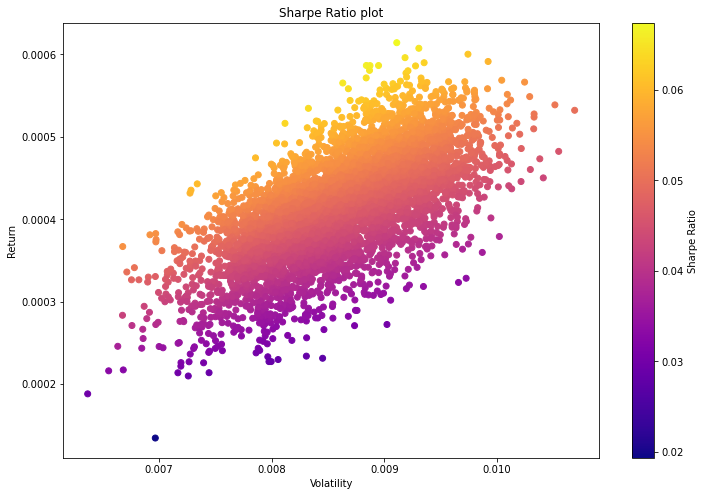

In [33]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Sharpe Ratio plot');

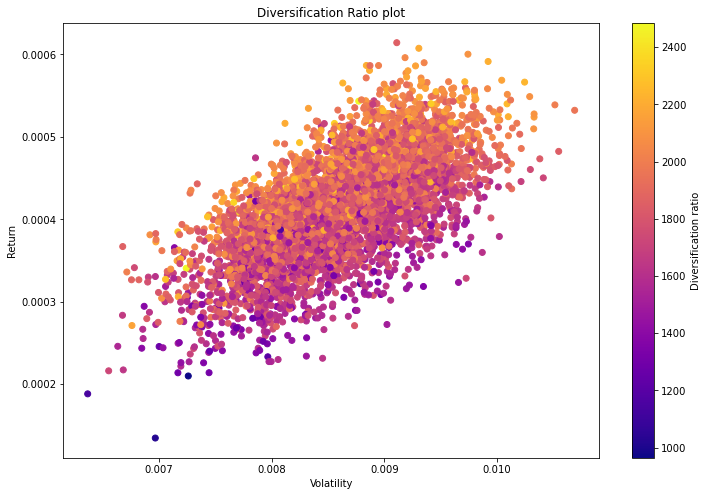

In [34]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=diversification_arr,cmap='plasma')
plt.colorbar(label='Diversification ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Diversification Ratio plot');

In [35]:
sharpe_arr.max()

0.06741055809150032

In [36]:
vol_arr.max()

0.010691248602191006

In [37]:
ret_arr.max()

0.0006141830140653827

In [38]:
diversification_arr

array([1724.8391154 , 1552.94395379, 1477.86740788, ..., 1813.48223091,
       2054.33846743, 1720.4007403 ])

Dynamic Programming

In [39]:
def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) 
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov(),weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])

In [40]:
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

In [41]:
def check_sum(weights): 
    return np.sum(weights) - 1

In [42]:
cons = ({'type':'eq','fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess = [0.1]*10

In [43]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results

     fun: -0.08796345398015226
     jac: array([ 3.44060063e-02,  6.58771517e-02,  1.57554168e-03,  1.06014349e-02,
        2.45803408e-03,  6.25065546e-02,  1.00034382e-03,  1.60385771e-02,
       -1.86264515e-09,  1.67585379e-02])
 message: 'Optimization terminated successfully'
    nfev: 143
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.76947842e-17,
       1.75617546e-16, 0.00000000e+00, 1.71737624e-16, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

In [44]:
opt_results.x

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.76947842e-17,
       1.75617546e-16, 0.00000000e+00, 1.71737624e-16, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

As negative value was optimized, it should be multiplied by -1\
Max. Sharpe ratio via optimizing: 0.087

__Efficient Return and Efficient Risk__ 

* _efficient risk maximises return for a given target risk_
*_efficient return minimises risk for a given target return_

General equation: 
$Var(r_p) = \frac{A*R^2_p - 2 * B * R_p + C}{A*C-B^2}$\
For efficient return I calculated R_p.

In [45]:
def eff_return(VarRp):
    return B/A + np.sqrt(((B**2)/(A**2)) - ((VarRp*B**2)/A) + VarRp*C - C/A)

In [46]:
eff_return(0.2)

0.07733765025247788

In [47]:
def eff_risk(Rp):
    return (A*Rp**2-2*B*Rp+C) / (A*C-B**2)

In [48]:
eff_risk(0.05)

0.08385198226695384

Self-Checking:

In [49]:
def EfficentRiskWeights(Rp):
    LambdaW = (B-A*Rp)/(B**2 - A*C)
    MuW = (B*Rp - C)/(B**2 - A*C)
    return LambdaW*np.dot(np.linalg.inv(log_return.cov()),log_return.mean().unique()) + MuW*np.dot(np.linalg.inv(log_return.cov()),I)

In [50]:
EfficentRiskWeights(0.05)

array([-22.53247668, -24.22294799, 126.63645933,  23.60760884,
       -94.97312845,  -1.63250413,  98.86358865, -69.86766396,
         8.68003712, -43.55897272])

Assertion that $W^T * r = Rp$

In [51]:
np.dot(EfficentRiskWeights(0.05).T,log_return.mean())

0.04999999999999931

In [52]:
np.dot(np.dot(EfficentRiskWeights(0.05).T,log_return.cov()),EfficentRiskWeights(0.05))

0.08385198226694979

Diversification ratio optimization

In [53]:
def get_divratio(weights): 
    weights = np.array(weights)
    PtVP = np.sqrt(np.dot(weights.T,np.dot(log_return.cov(), weights)))
    diversification_arr = np.dot(weights.T, std_df)/PtVP
    return diversification_arr

In [54]:
get_divratio([0.1]*10)

1827.1673982641862

In [55]:
def neg_divrate(weights): 
    return get_divratio(weights) * -1

In [56]:
opt_results = minimize(neg_divrate, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results

     fun: -3055.782998867272
     jac: array([ 8.63037109e-02,  3.68035052e+03, -7.76367188e-02,  2.18660330e+03,
        4.83908081e+01,  3.88300677e+03,  4.13535187e+02,  3.16791840e+03,
        2.14074289e+03,  2.94926450e+03])
 message: 'Positive directional derivative for linesearch'
    nfev: 143
     nit: 16
    njev: 12
  status: 8
 success: False
       x: array([4.73158298e-01, 5.32505836e-09, 5.26945687e-01, 9.87046791e-10,
       1.54745251e-09, 5.91414957e-09, 1.23319207e-09, 3.83737660e-09,
       8.53009803e-10, 3.20280184e-09])

Maximum DivRatio = 3055.47